# Model Comparison — Emission Point Classification with Temporal Architectures

This notebook performs a structured comparison of three neural network models applied to the task of classifying particle emission source points (E1, E2, E3) in a simulated industrial environment. The models evaluated are:

- **CNN1D**: Convolutional Neural Network over time-series windows;
- **LSTM**: Long Short-Term Memory network capturing temporal dependencies;
- **MLP**: A baseline Multi-Layer Perceptron operating on static aggregated features.

The input data for CNN1D and LSTM consists of **sliding windows of temporal sensor readings**, enabling the models to learn patterns over time. The MLP, in contrast, uses pre-aggregated statistical features and serves as a reference for non-temporal modeling.

---

## Notebook Structure

0. Load performance summary files for each model;
1. Display metrics in a comparison table;
2. Generate bar plots comparing performance indicators;
3. Generate radar plots comparing performance indicators.
---

This notebook is intended for **scientific validation and benchmarking**. It enables detailed performanc


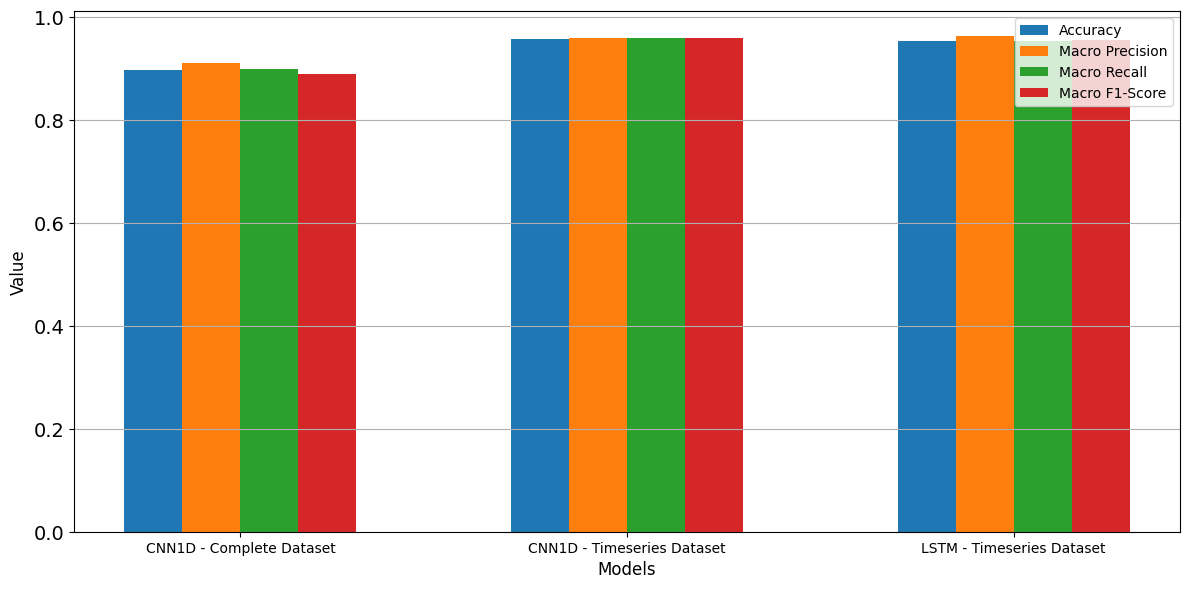

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Dados fornecidos
models = ['CNN1D - Complete Dataset', 'CNN1D - Timeseries Dataset', 'LSTM - Timeseries Dataset']
metrics = ['Accuracy', 'Macro Precision', 'Macro Recall', 'Macro F1-Score']

# Exemplo de valores hipotéticos (substitua pelos valores reais obtidos na avaliação dos modelos)
values = {
    'CNN1D - Complete Dataset': [0.8976, 0.91, 0.90, 0.89],
    'CNN1D - Timeseries Dataset': [0.9575, 0.96, 0.96, 0.96],
    'LSTM - Timeseries Dataset': [0.9543, 0.9637, 0.9543, 0.9563]
}

# Definir posição das barras
bar_width = 0.15
index = np.arange(len(models))

# Criar gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Plotar barras para cada métrica
for i, metric in enumerate(metrics):
    metric_values = [values[model][i] for model in models]
    ax.bar(index + i * bar_width, metric_values, bar_width, label=metric)

# Adicionar detalhes do gráfico
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.tick_params(axis='y', labelsize=14)
ax.set_xticks(index + bar_width * (len(metrics) - 1) / 2)
ax.set_xticklabels(models)
ax.legend()

plt.grid(axis='y')
plt.tight_layout()
plt.show()

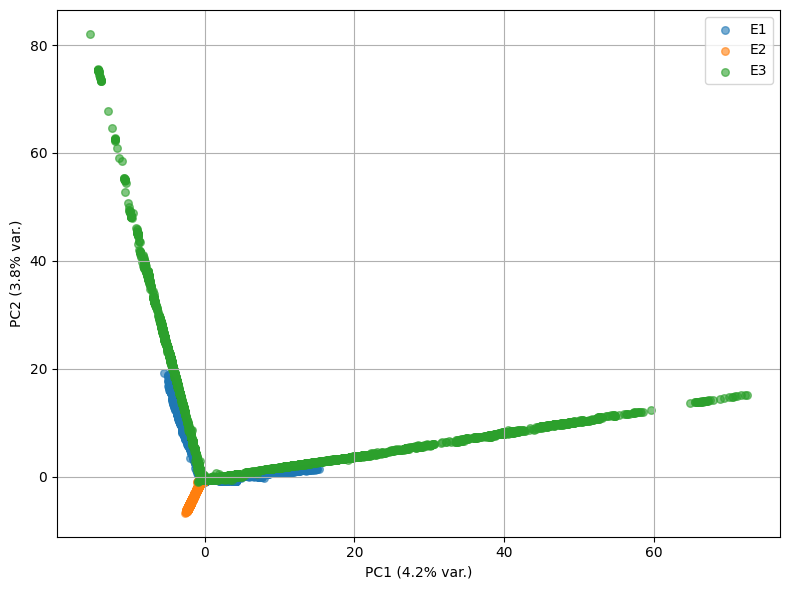

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Supondo que você já tenha um DataFrame `df` com as colunas de features e a coluna 'classe'
df = pd.read_csv("../data/processed/complete_dataset.csv")

# 1. Separar X e y
X = df.drop(columns=["Emission_Point"])
y = df["Emission_Point"]

# Convert to numeric and fill missing
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# 2. Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
explained_var = pca.explained_variance_ratio_ * 100  # Em porcentagem

# 4. Construir DataFrame para plotagem
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Emission_Point"] = y.values

# 5. Plotar gráfico
plt.figure(figsize=(8, 6))
for label in df_pca["Emission_Point"].unique():
    subset = df_pca[df_pca["Emission_Point"] == label]
    plt.scatter(subset["PC1"], subset["PC2"], label=label, alpha=0.6, s=30)

plt.xlabel(f"PC1 ({explained_var[0]:.1f}% var.)")
plt.ylabel(f"PC2 ({explained_var[1]:.1f}% var.)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

1469/1469 [==============================] - 2s 1ms/step


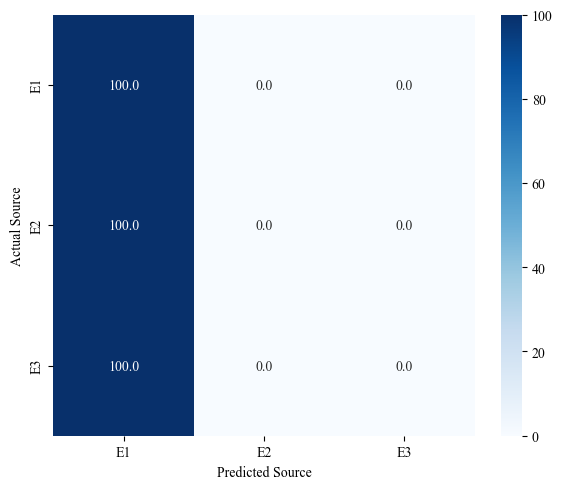

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

plt.rcParams["font.family"] = "Times New Roman"

# Função para plotar a matriz de confusão em porcentagem
def plot_confusion_matrix(y_true, y_pred, title):
    labels = ["E1", "E2", "E3"]
    cm = confusion_matrix(y_true, y_pred, labels=labels, normalize='true')  # Normaliza por linha (classe real)
    cm_percent = cm * 100  # Converter para porcentagem

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Source")
    plt.ylabel("Actual Source")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# 1. Carregar modelo e dataset
model = load_model("../models/mlp_model_complete_dataset.keras")
df = pd.read_csv("../data/processed/complete_dataset.csv")

# 2. Separar features e classe
X = df.drop(columns=["Emission_Point", "Subfolder"])
y = df["Emission_Point"]

# 3. Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Codificar as classes
label_encoder = LabelEncoder()
label_encoder.fit(y)

# 5. Selecionar 20% dos dados
np.random.seed(42)
idx = np.random.choice(len(X), size=int(0.2 * len(X)), replace=False)
X_sample = X_scaled[idx]
y_sample = y.iloc[idx].values

# 6. Realizar predição
y_pred_encoded = model.predict(X_sample)
y_pred = label_encoder.inverse_transform(np.argmax(y_pred_encoded, axis=1))

# 7. Plotar matriz de confusão
plot_confusion_matrix(y_sample, y_pred, "")



2/2 [==============================] - 0s 2ms/step


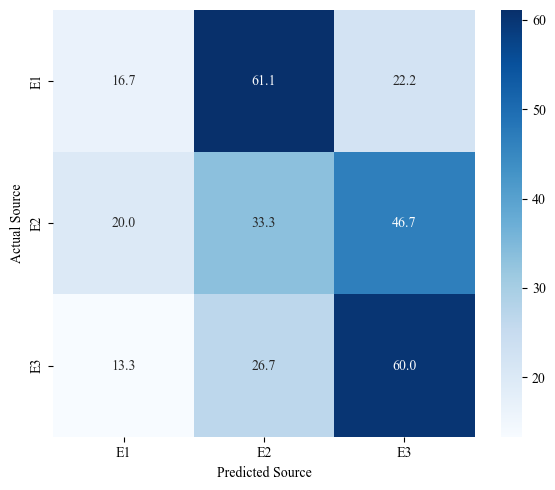

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

# Definir fonte como Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Função para plotar matriz de confusão em porcentagem
def plot_confusion_matrix(y_true, y_pred, title):
    labels = ["E1", "E2", "E3"]
    cm = confusion_matrix(y_true, y_pred, labels=labels, normalize='true')
    cm_percent = cm * 100

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Source")
    plt.ylabel("Actual Source")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# 1. Carregar modelo e dataset
model = load_model("../models/mlp_model_aggregated_dataset.keras")
df = pd.read_csv("../data/processed/aggregated_dataset.csv")

# 2. Separar features e classe
X = df.drop(columns=["classe", "tag"])
y = df["classe"]

# 3. Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Codificar classes
label_encoder = LabelEncoder()
label_encoder.fit(y)

# 5. Selecionar 20% aleatório
np.random.seed(42)
idx = np.random.choice(len(X), size=int(0.2 * len(X)), replace=False)
X_sample = X_scaled[idx]
y_sample = y.iloc[idx].values

# 6. Predição com o modelo
y_pred_encoded = model.predict(X_sample)
y_pred = label_encoder.inverse_transform(np.argmax(y_pred_encoded, axis=1))

# 7. Plotar matriz de confusão
plot_confusion_matrix(y_sample, y_pred, "")

144/144 [==============================] - 1s 3ms/step


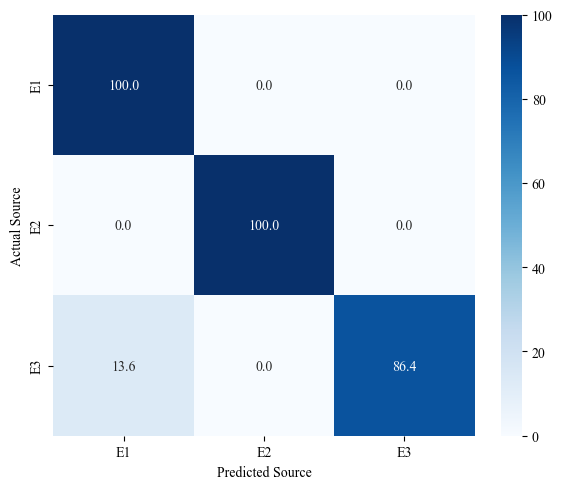

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Definir fonte padrão
plt.rcParams["font.family"] = "Times New Roman"

# Função para plotar a matriz de confusão
def plot_confusion_matrix(y_true, y_pred, title):
    labels = ["E1", "E2", "E3"]
    cm = confusion_matrix(y_true, y_pred, labels=labels, normalize='true')
    cm_percent = cm * 100
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Source")
    plt.ylabel("Actual Source")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# 1. Carregar modelo e dataset
model = load_model("../models/cnn1d_model_timeseries_dataset.keras")
df = pd.read_csv("../data/processed/timeseries_dataset.csv")

# 2. Separar features e rótulos
X = df.drop(columns=["classe"]).values
y = df["classe"].values

# 3. Descobrir número de sensores com base em janela de 30 timesteps
n_features = int(X.shape[1] / 30)
X_reshaped = X.reshape(-1, 30, n_features)

# 4. Codificar rótulos
label_encoder = LabelEncoder()
label_encoder.fit(y)

# 5. Selecionar 20% aleatoriamente
np.random.seed(42)
idx = np.random.choice(len(X_reshaped), size=int(0.2 * len(X_reshaped)), replace=False)
X_sample = X_reshaped[idx]
y_sample = y[idx]

# 6. Fazer predições
y_pred_encoded = model.predict(X_sample)
y_pred = label_encoder.inverse_transform(np.argmax(y_pred_encoded, axis=1))

# 7. Gerar matriz de confusão
plot_confusion_matrix(y_sample, y_pred, "")


144/144 [==============================] - 2s 5ms/step


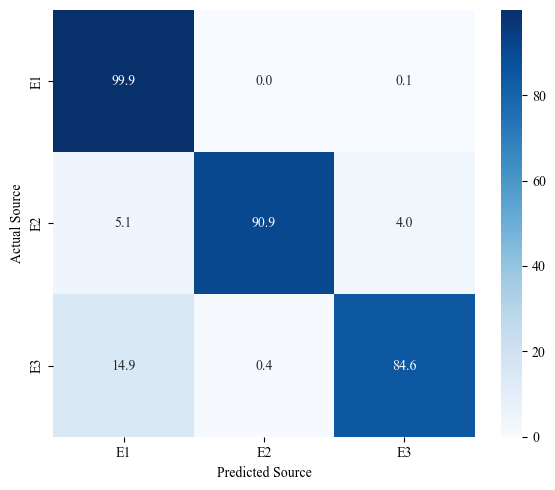

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Definir fonte global
plt.rcParams["font.family"] = "Times New Roman"

# Função para plotar a matriz de confusão
def plot_confusion_matrix(y_true, y_pred, title):
    labels = ["E1", "E2", "E3"]
    cm = confusion_matrix(y_true, y_pred, labels=labels, normalize='true')
    cm_percent = cm * 100
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Source")
    plt.ylabel("Actual Source")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# 1. Carregar modelo e dataset
model = load_model("../models/lstm_model_timeseries_dataset.keras")
df = pd.read_csv("../data/processed/timeseries_dataset.csv")

# 2. Separar features e rótulos
X = df.drop(columns=["classe"]).values
y = df["classe"].values

# 3. Determinar número de sensores e remodelar
n_features = int(X.shape[1] / 30)
X_reshaped = X.reshape(-1, 30, n_features)

# 4. Codificar os rótulos
label_encoder = LabelEncoder()
label_encoder.fit(y)

# 5. Selecionar 20% aleatório
np.random.seed(42)
idx = np.random.choice(len(X_reshaped), size=int(0.2 * len(X_reshaped)), replace=False)
X_sample = X_reshaped[idx]
y_sample = y[idx]

# 6. Fazer predição
y_pred_encoded = model.predict(X_sample)
y_pred = label_encoder.inverse_transform(np.argmax(y_pred_encoded, axis=1))

# 7. Plotar matriz de confusão
plot_confusion_matrix(y_sample, y_pred, "")
